Instalando biblioteca que não tem no Collab

Importação de Bibliotecas

In [1]:
import os #organizador de pasta
import numpy as np #estruturação dos dados
import matplotlib.pyplot as plt #plot gráfico
import seaborn as sns #plot gráfico
from PIL import Image #visualização de img
import pandas as pd #estruturação dos dados
import joblib #convertendo imagens em valores numéricos .gz

Abrindo a primeira imagem de GTS CHO 745:

In [2]:
os.listdir()

['.config',
 '.ipynb_checkpoints',
 'Experiment_CHO_ICAM_105_10ug_09_ch01.tif',
 'sample_data']

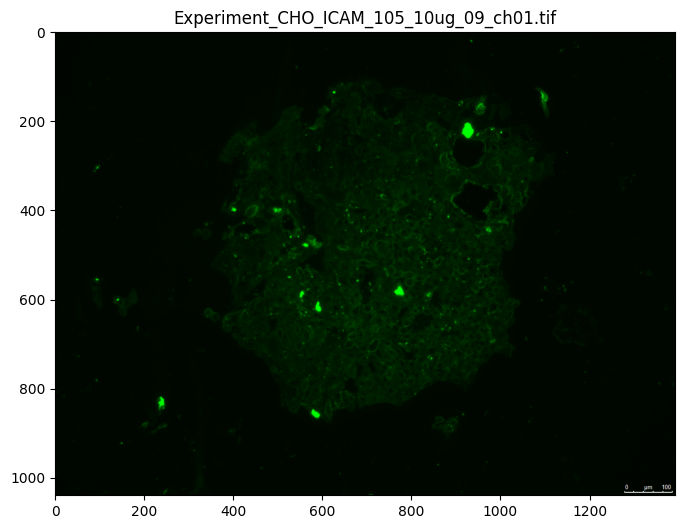

In [3]:
path = os.listdir()[2] #chamando a primeira imagem
img = Image.open(path) #abrinado a primeira imagem

plt.figure(figsize=(8,8)) #tamanho da imagem
plt.imshow(img) #abrindo a imagem
plt.title(path) #título recortando o nome do título que corresponde o caminho da imagem[50:-4]
plt.show()

Convertendo a imagem escolhida para um DataFrame

In [4]:
np.array(img).shape

(1040, 1392, 3)

In [5]:
def img_to_df(img, por_retirada: float = 0.0001) -> pd.DataFrame:
  img_array = np.array(img, dtype="float64")/255
  img_df_original = pd.DataFrame(
                        columns=["red"],
                        data=img_array[:,:,0].reshape(-1,1)
                    )
  img_df_original["green"] = img_array[:,:,1].reshape(-1,1)
  img_df_original["blue"] = img_array[:,:,2].reshape(-1,1)

  img_df_original_green = img_df_original['green'].copy()
  freq = (
      img_df_original_green.value_counts(normalize=True)
      .to_frame()
      .reset_index()
      .sort_values('green', ascending=False)
  )

  soma = 0
  for n in range(len(freq)):
    soma += freq.iloc[n,1]
    if soma >= por_retirada:
      break
  threshold = freq.iloc[n,0]

  img_df_filtrada = img_df_original.copy()
  img_df_filtrada.loc[img_df_filtrada["green"] >= threshold, "green"] = 0.0

  return (img_df_original, img_df_filtrada)

In [6]:
import seaborn_image as isns

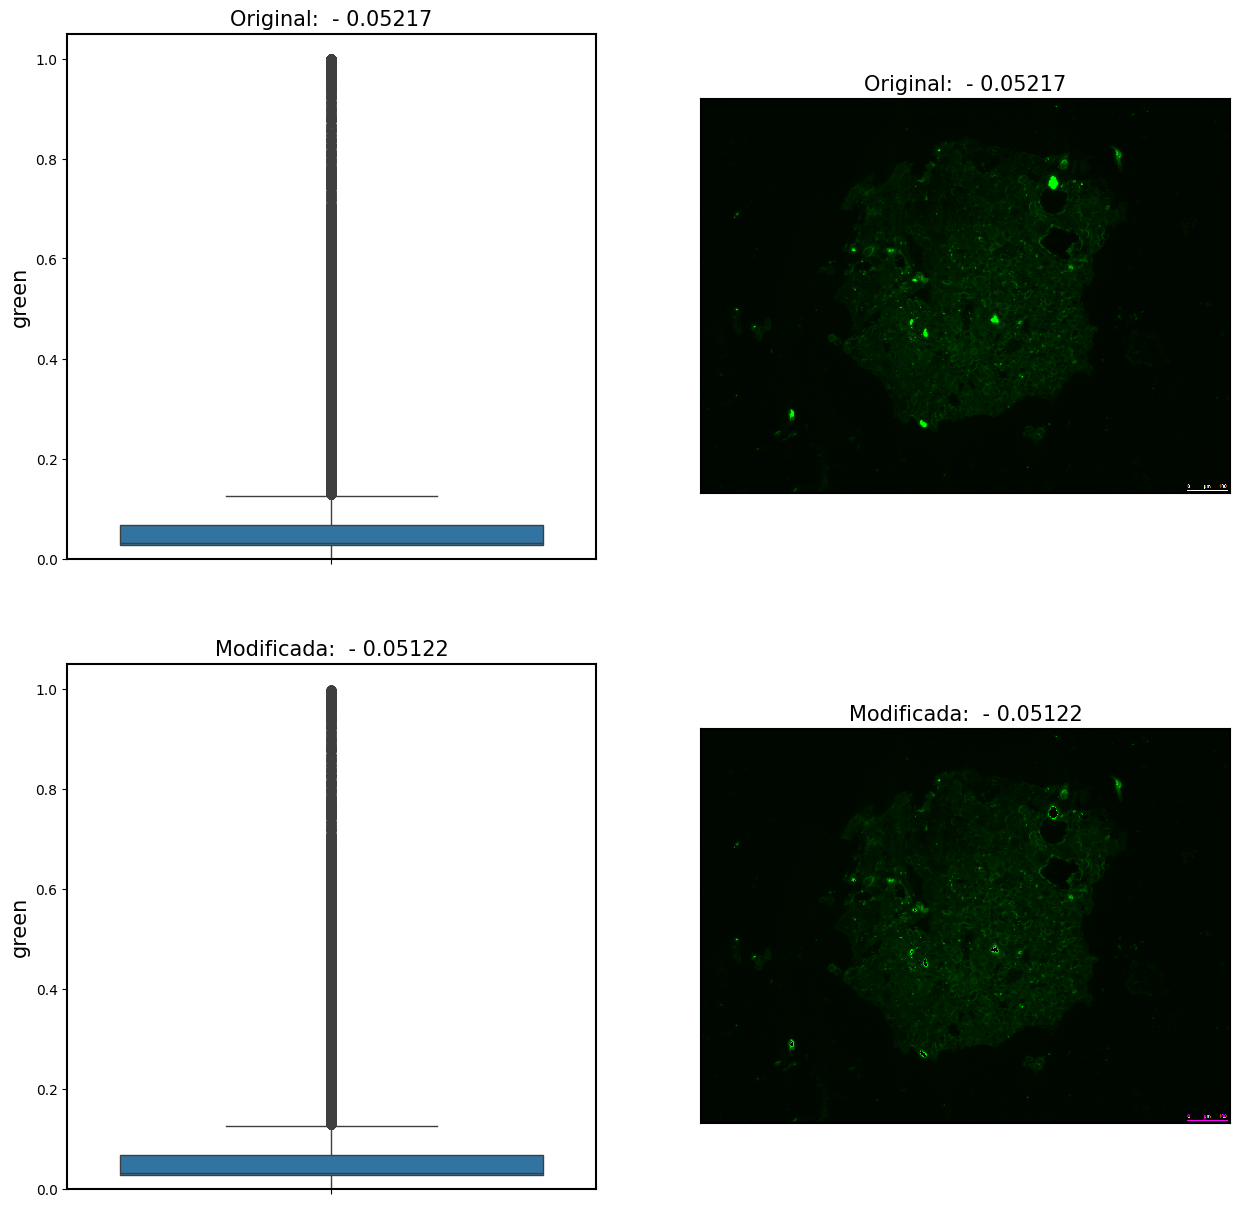

In [7]:
por_retirada = 0.0001
img_df_first, img_df_second_filtrada = img_to_df(img=img, por_retirada=por_retirada)

fig, ax = plt.subplots(2,2, figsize=(15,15))

title = f"Original: {path[50:-4]} - {img_df_first['green'].mean():.5f}"
g = sns.boxplot(y="green", data=img_df_first, ax=ax[0,0])
g.set(
  title=title,
  ylim=(0, 1.05)
)

i = isns.imgplot(np.array(img_df_first).reshape(
  np.array(img).shape[0],
  np.array(img).shape[1],
  np.array(img).shape[2],
), ax=ax[0,1])
i.set(
  title=title,
)

title = f"Modificada: {path[50:-4]} - {img_df_second_filtrada['green'].mean():.5f}"
h = sns.boxplot(y="green", data=img_df_second_filtrada, ax=ax[1,0])
h.set(
  title=title,
  ylim=(0, 1.05)
)

j = isns.imgplot(np.array(img_df_second_filtrada).reshape(
  np.array(img).shape[0],
  np.array(img).shape[1],
  np.array(img).shape[2],
), ax=ax[1,1])
j.set(
  title=title,
)

plt.show()

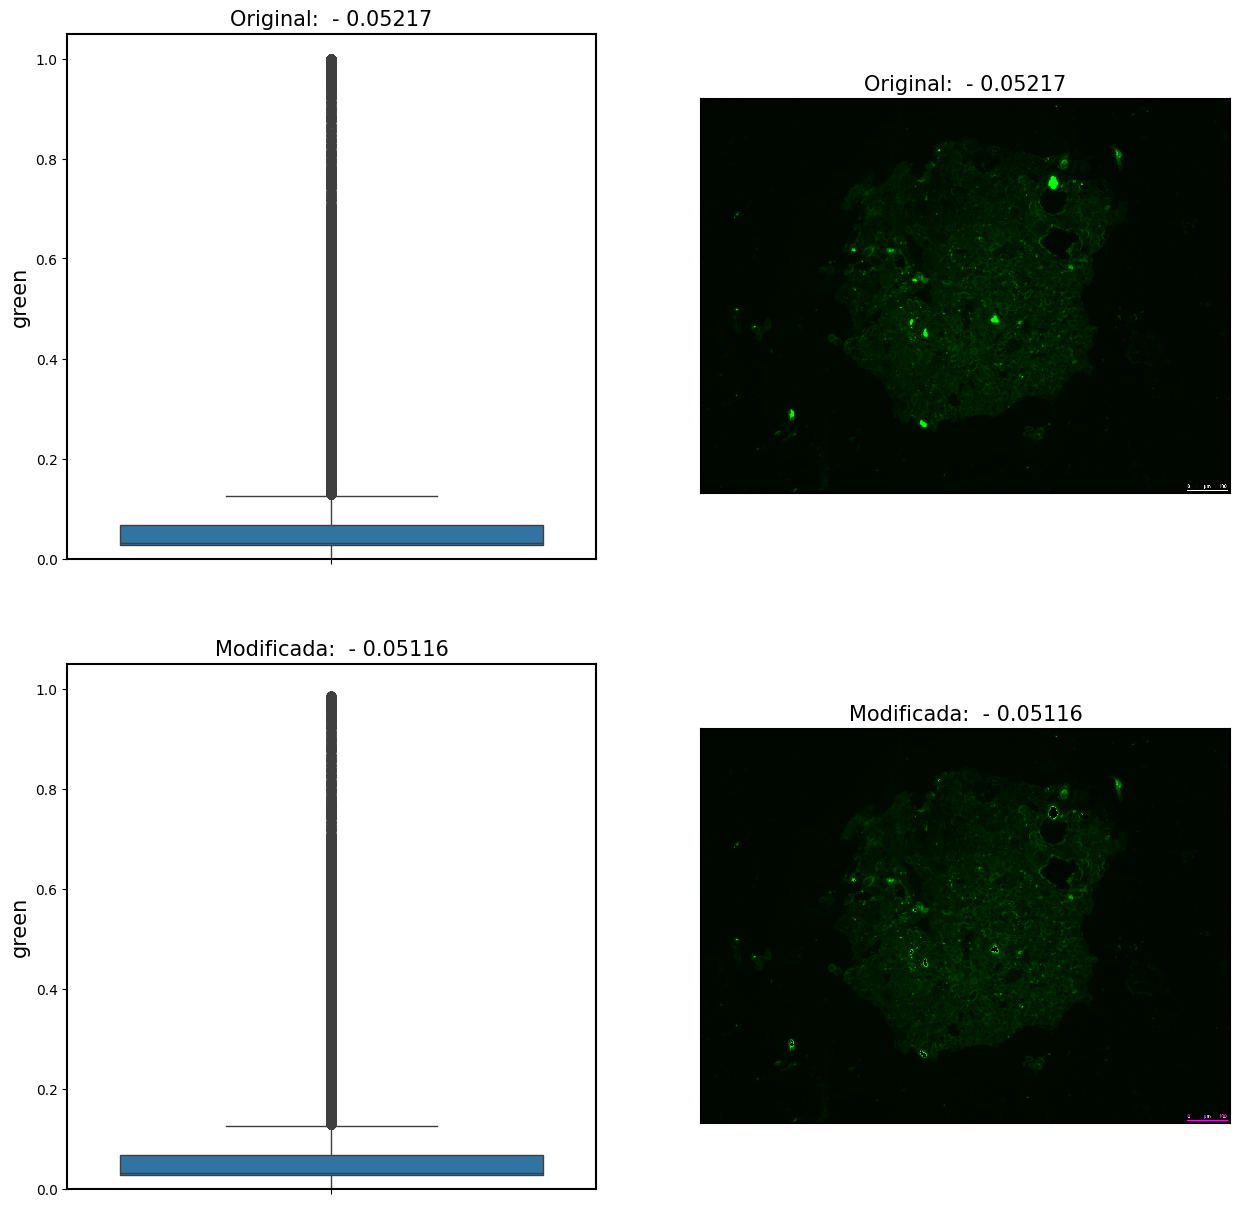

In [8]:
por_retirada = 0.001
img_df_first, img_df_second_filtrada = img_to_df(img=img, por_retirada=por_retirada)

fig, ax = plt.subplots(2,2, figsize=(15,15))

title = f"Original: {path[50:-4]} - {img_df_first['green'].mean():.5f}"
g = sns.boxplot(y="green", data=img_df_first, ax=ax[0,0])
g.set(
  title=title,
  ylim=(0, 1.05)
)

i = isns.imgplot(np.array(img_df_first).reshape(
  np.array(img).shape[0],
  np.array(img).shape[1],
  np.array(img).shape[2],
), ax=ax[0,1])
i.set(
  title=title,
)

title = f"Modificada: {path[50:-4]} - {img_df_second_filtrada['green'].mean():.5f}"
h = sns.boxplot(y="green", data=img_df_second_filtrada, ax=ax[1,0])
h.set(
  title=title,
  ylim=(0, 1.05)
)

j = isns.imgplot(np.array(img_df_second_filtrada).reshape(
  np.array(img).shape[0],
  np.array(img).shape[1],
  np.array(img).shape[2],
), ax=ax[1,1])
j.set(
  title=title,
)

plt.show()

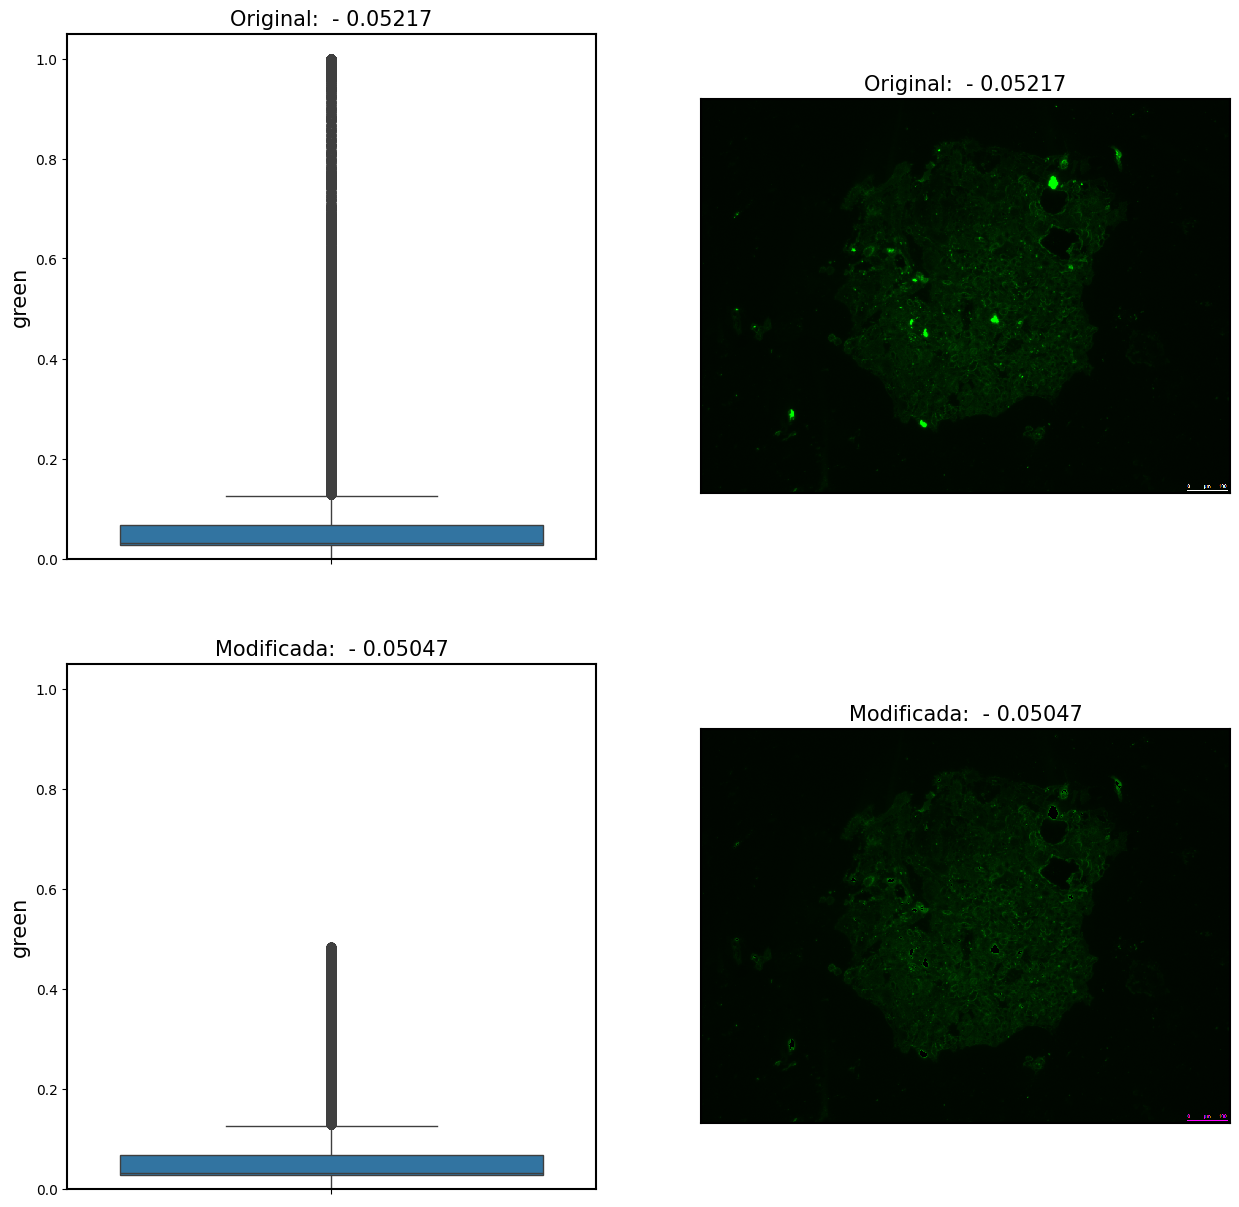

In [9]:
por_retirada = 0.002
img_df_first, img_df_second_filtrada = img_to_df(img=img, por_retirada=por_retirada)

fig, ax = plt.subplots(2,2, figsize=(15,15))

title = f"Original: {path[50:-4]} - {img_df_first['green'].mean():.5f}"
g = sns.boxplot(y="green", data=img_df_first, ax=ax[0,0])
g.set(
  title=title,
  ylim=(0, 1.05)
)

i = isns.imgplot(np.array(img_df_first).reshape(
  np.array(img).shape[0],
  np.array(img).shape[1],
  np.array(img).shape[2],
), ax=ax[0,1])
i.set(
  title=title,
)

title = f"Modificada: {path[50:-4]} - {img_df_second_filtrada['green'].mean():.5f}"
h = sns.boxplot(y="green", data=img_df_second_filtrada, ax=ax[1,0])
h.set(
  title=title,
  ylim=(0, 1.05)
)

j = isns.imgplot(np.array(img_df_second_filtrada).reshape(
  np.array(img).shape[0],
  np.array(img).shape[1],
  np.array(img).shape[2],
), ax=ax[1,1])
j.set(
  title=title,
)

plt.show()

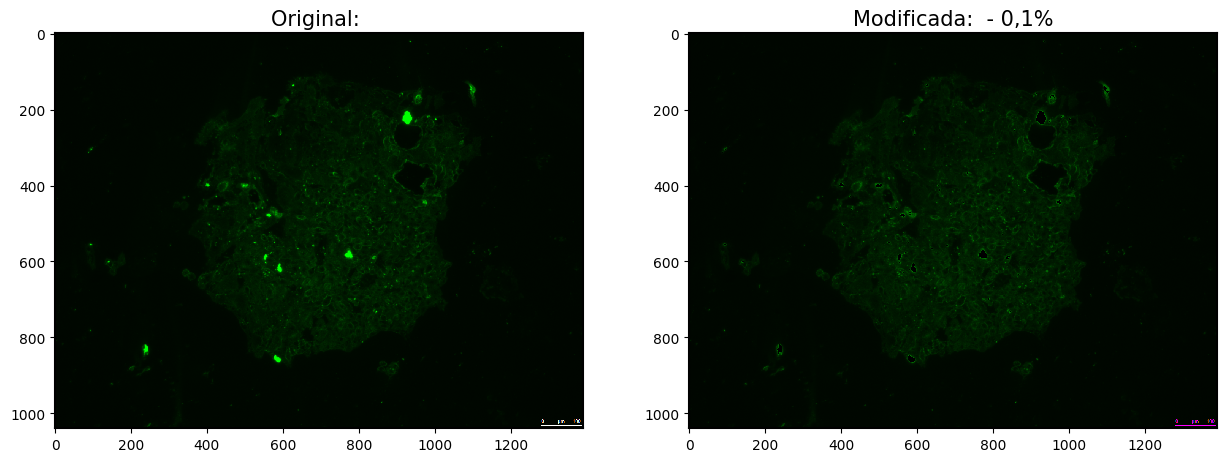

In [10]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(np.array(img_df_first).reshape(1040, 1392, 3))
plt.title(f"Original: {path[50:-4]}")

plt.subplot(1, 2, 2)
plt.imshow(np.array(img_df_second_filtrada).reshape(1040, 1392, 3))
plt.title(f"Modificada: {path[50:-4]} - 0,1%")
plt.show()